##Ocena jakości win czerwonych



### Wczytanie potrzebnych biblotek i funkcji

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

###Opis danych

In [ ]:
df = pd.read_csv('winequality-red.csv')
df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [ ]:
df.shape
#Zbiór danych składa się z 12 kolumn i 1599 wierszy

(1599, 12)

Dane dotyczą czerwonych odmian portugalskiego wina „Vinho Verde”.

Zmienne wejściowe(na podstawie badań fizykochemicznych):

1. $\textbf{fixed acidity}$ (określona kwasowość) - większość kwasów występujących w winie lub kwasy nielotne \\
2. $\textbf{volatile acidity}$(lotna kwasowość) - ilość kwasu octowego w winie, która w zbyt dużych ilościach może powodować nieprzyjemny, octowy smak \\
3. $\textbf{citric acid}$(kwas cytrynowy) - występujący w małych ilościach kwas cytrynowy może dodać winu „świeżości” i smaku
4. $\textbf{residual sugar}$(cukier resztkowy) - ilość cukru pozostałego po zakończeniu fermentacji
5. $\textbf{chlorides}$(chlorki) - ilość soli w winie
6. $\textbf{free sulfur dioxide}$(wolny dwutlenek wina) - wolna forma $SO_2$ występuje w równowadze pomiędzy cząsteczkowym SO2 a jonem wodorosiarczynowymwolna forma $SO_2$
7. $\textbf{total sulfur dioxide}$(całkowity dwutlenek siarki) - ilość wolnych i związanych form $SO_2$; w niskich stężeniach $SO_2$ jest w większości niewykrywalny w winie
8. $\textbf{density}$(gęstość) - gęstość wody jest zbliżona do gęstości wody w zależności od procentowej zawartości alkoholu i cukru
9. $\textbf{pH}$ - opisuje, jak kwaśne lub zasadowe jest wino w skali od 0 (bardzo kwaśne) do 14 (bardzo zasadowe)
10. $\textbf{sulphates}$(siarczany) - dodatek do wina, który może zwiększać poziom dwutlenku siarki (S02), który działa przeciwbakteryjnie
11. $\textbf{alcohol}$(alkohol)
12. $\textbf{quality}$(jakość) - wynik pomiędzy 0 a 10, gdzie 10 to najlepsze

### Analiza danych i wizualizacje

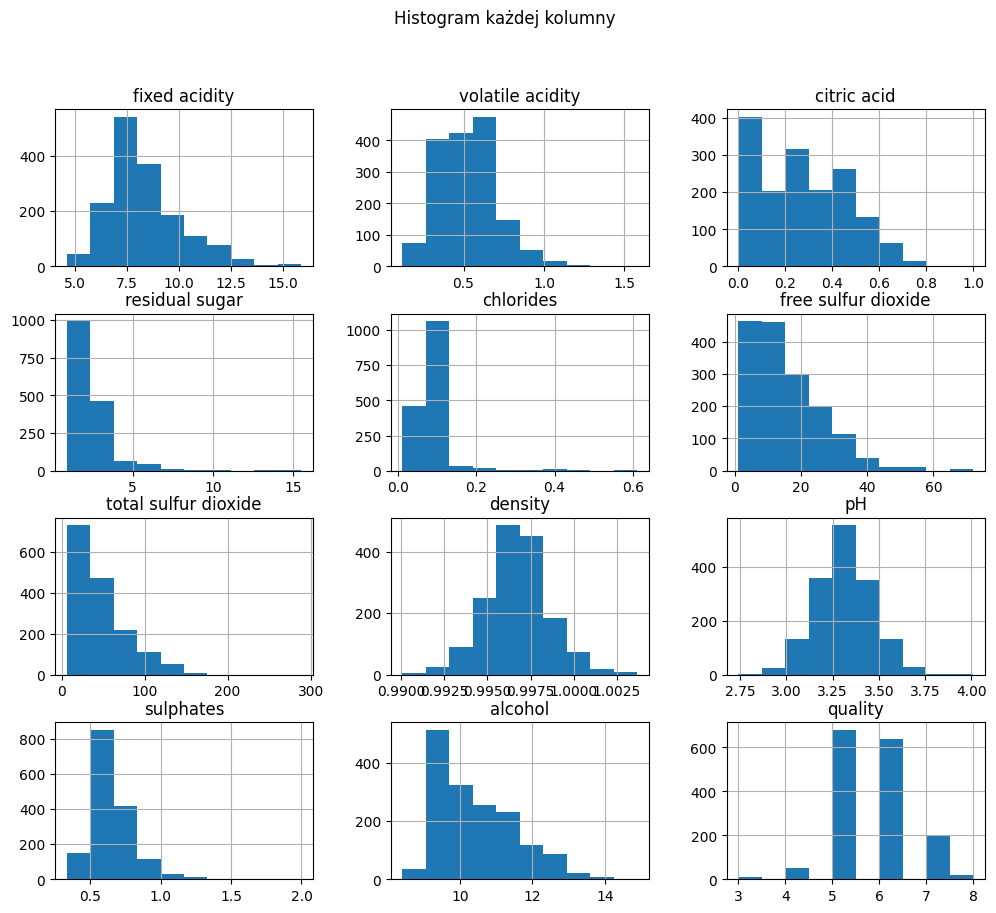

In [ ]:
df.hist(figsize=(12, 10))
plt.suptitle('Histogram każdej kolumny')
plt.show()

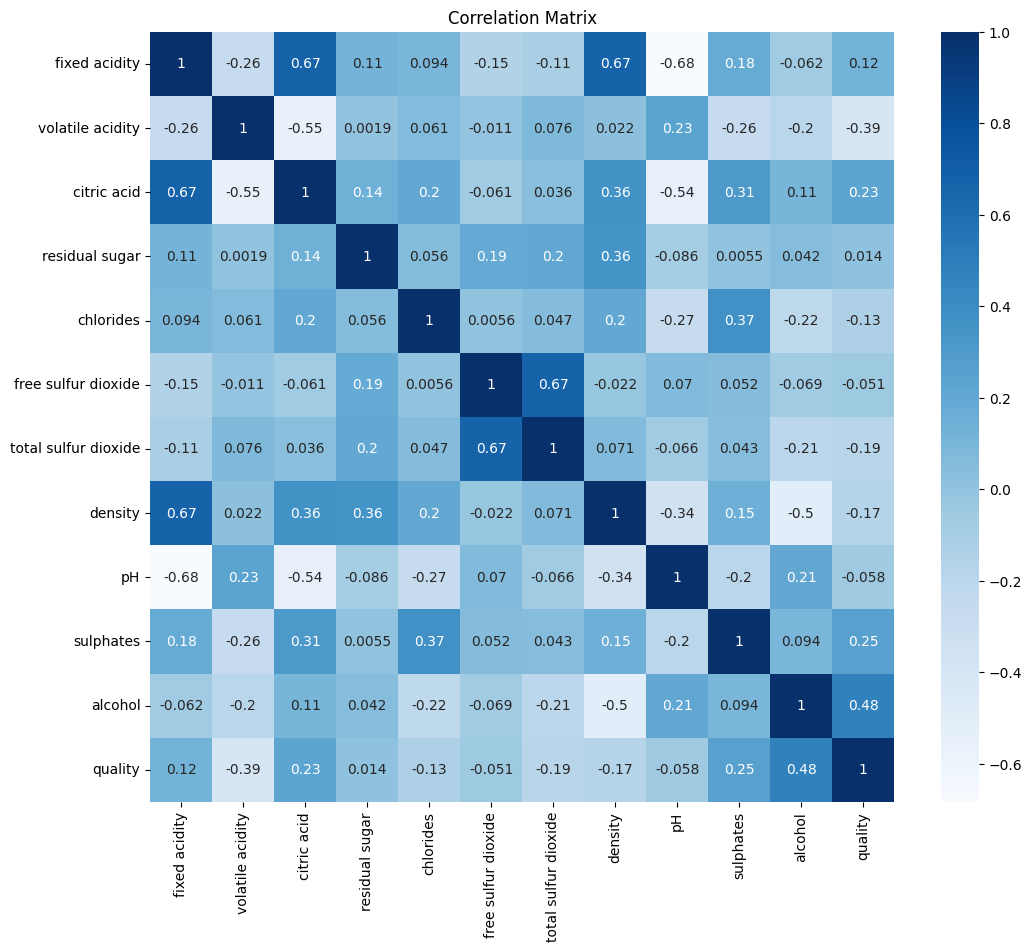

In [ ]:
#KORELACJA
corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()


Na podstawie tej mapy możemy stwierdzić, że cechy wina nie są ze sobą skorelowane. \\
Wysoko skorelowane cechy: \\
ustalona kwasowość i kwas cytrynowy \\
wolny dwutlenek siarki i całkowity dwutlenek siarki \\
ustalona kwasowość i gęstość \\

Słabo skorelowane cechy: \\
kwas cytrynowy i kwasowość lotna \\
stała kwasowość i pH \\
gęstość i alkohol


<Axes: ylabel='count'>

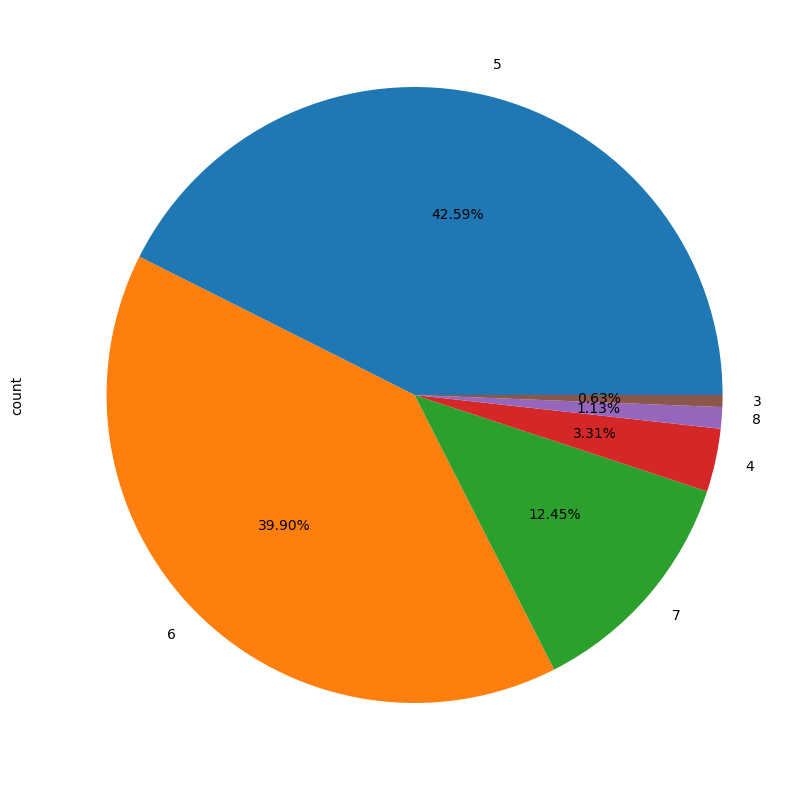

In [ ]:
plt.figure(1, figsize=(10,10))
df['quality'].value_counts().plot.pie(autopct="%1.2f%%")

Jakość jest oceniana w skali od 1 do 10, jak widzimy przeważają oceny 5 i 6.
Przyjmijmy że ocena od 6 w górę jest dobrą jakością wina, a poniżej złą.
Przekształcamy dane tak że: \\
0 - słaba jakość \\
1 - dobra jakość

In [ ]:
df["quality"] = np.where(df["quality"] > 5, 1, 0)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


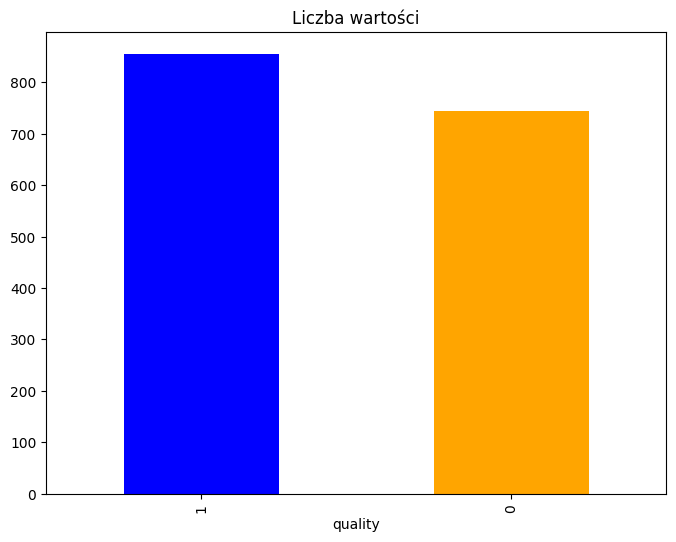

In [ ]:
value_counts = df['quality'].value_counts()

plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Liczba wartości')
plt.show()

In [ ]:
value_counts

quality
1    855
0    744
Name: count, dtype: int64

### Budowanie modeli

In [ ]:
# Zmienna zależna
y = df["quality"]

# Zmienne niezależne
X = df.drop("quality", axis = 1)

In [ ]:
# Podział danych na zestawy treningowy i testowy(0.25)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
# Wyświetlam kształty podzielonych danych
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (1199, 11)
Shape of X_test:  (400, 11)
Shape of y_train:  (1199,)
Shape of y_test (400,)


####Regresja Logistyczna

In [ ]:
model = LogisticRegression(max_iter=1000)

# Trenujemy model
model.fit(X_train, y_train)

# Przewidujemy wartości na podstawie zestawu testowego
y_pred = model.predict(X_test)

# Oceniamy model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.7325
Confusion Matrix:
[[132  46]
 [ 61 161]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.74      0.71       178
           1       0.78      0.73      0.75       222

    accuracy                           0.73       400
   macro avg       0.73      0.73      0.73       400
weighted avg       0.74      0.73      0.73       400



In [ ]:
results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
results = results.reset_index(drop=True)
results.style.background_gradient(cmap="viridis")

,Actual,Predicted
0,1,0
1,0,0
2,1,1
3,0,0
4,1,1
5,0,0
6,0,0
7,0,0
8,0,1
9,1,1


####Drzewo Decyzyjne

In [ ]:
# Tworzymy model drzewa decyzyjnego
model = DecisionTreeClassifier(random_state=42)

# Trenujemy model
model.fit(X_train, y_train)

# Przewidujemy wartości na podstawie zestawu testowego
y_pred = model.predict(X_test)

# Oceniamy model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.7175
Confusion Matrix:
[[120  58]
 [ 55 167]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.67      0.68       178
           1       0.74      0.75      0.75       222

    accuracy                           0.72       400
   macro avg       0.71      0.71      0.71       400
weighted avg       0.72      0.72      0.72       400



In [ ]:
results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
results = results.reset_index(drop=True)
results.style.background_gradient(cmap="viridis")

,Actual,Predicted
0,1,1
1,0,0
2,1,0
3,0,1
4,1,1
5,0,0
6,0,0
7,0,0
8,0,1
9,1,1


####Las losowy

In [ ]:
# Tworzymy model lasu losowego
model = RandomForestClassifier(random_state=42)

# Trenujemy model
model.fit(X_train, y_train)

# Przewidujemy wartości na podstawie zestawu testowego
y_pred = model.predict(X_test)

# Oceniamy model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.7825
Confusion Matrix:
[[132  46]
 [ 41 181]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       178
           1       0.80      0.82      0.81       222

    accuracy                           0.78       400
   macro avg       0.78      0.78      0.78       400
weighted avg       0.78      0.78      0.78       400



In [ ]:
results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
results = results.reset_index(drop=True)
results.style.background_gradient(cmap="viridis")

,Actual,Predicted
0,1,0
1,0,0
2,1,0
3,0,0
4,1,1
5,0,0
6,0,0
7,0,0
8,0,1
9,1,1


Najbardziej dokładnym algorytmem okazał się w tym przypadku - las losowy